In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is a lot of cabin data missing.  I think i will leave that out.  Ticket number?  Probably skip that one.  Age is missing some data.  We don't have a ton of data points.  I may do a median fill.  I think I will skip Embarked for now.  

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Check how variables correlate to survial.**

In [6]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [7]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The survival rate is most strongly correlated to Fare and Pclass.  Those two might be combined, because they are correlated at 54%.

In [8]:
# Fill missing age with a median value.  Fill missing Embarked with 'Q'.
# In retrospect it is probably better to setup a transformation pipeline.
median = train_data["Age"].median()
train_data["Age"].fillna(median, inplace=True)
test_data["Age"].fillna(median, inplace=True)

# Age Analysis

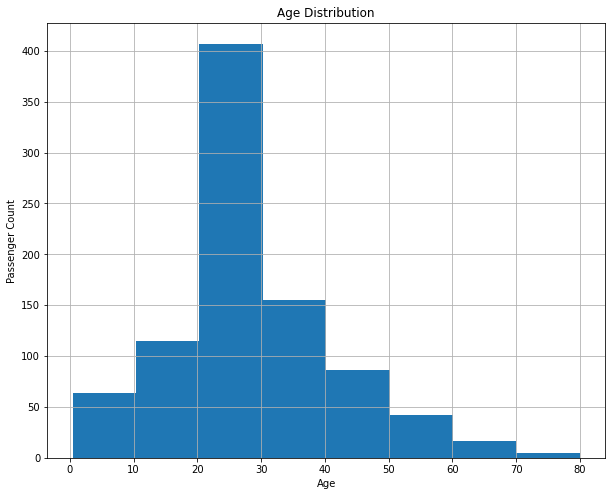

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

train_data['Age'].hist(bins=8, figsize=(10,8))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

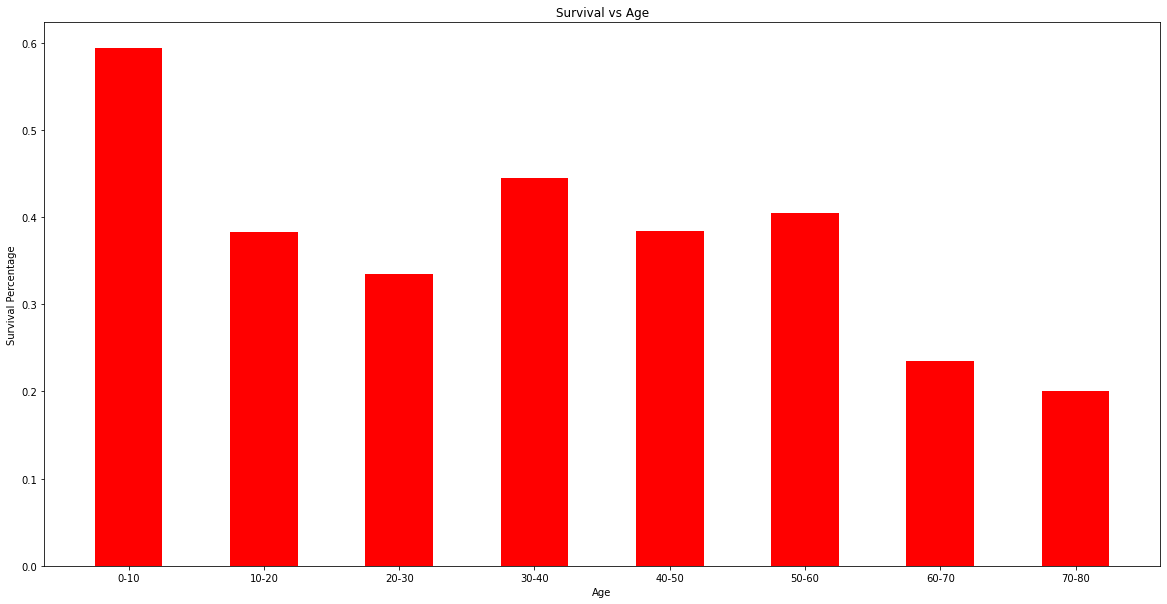

In [10]:
x = train_data['Age']
y = train_data['Survived']

age = 0
survival_percentage = list()
while age <= 70:
    max_age = age + 10
    i = 0
    count_total = 0
    count_survivors = 0
    while i < len(x):
        person_age = x[i]
        if age < person_age <= max_age:
            if y[i] == 1:
                count_survivors += 1
            count_total += 1
        i += 1
    survival_percentage.append(count_survivors / count_total)
    age += 10
categories = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
plt.figure(figsize=(20,10))
plt.bar(categories, survival_percentage, color='red',width = .5)
plt.xlabel("Age")
plt.ylabel("Survival Percentage")
plt.title("Survival vs Age")
plt.show

It appears that children age 0-10 did have a higher survival rate.  Not as high as women, but better than average.  Death rate for those above 60 have a significant drop off.  However, the number of samples in the range of 60-80 is pretty small.  Possibly a flipped cubic shape, or just negative linear relationship.

# Sex Analysis

In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [12]:
men = train_data.loc[train_data.Sex=='male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


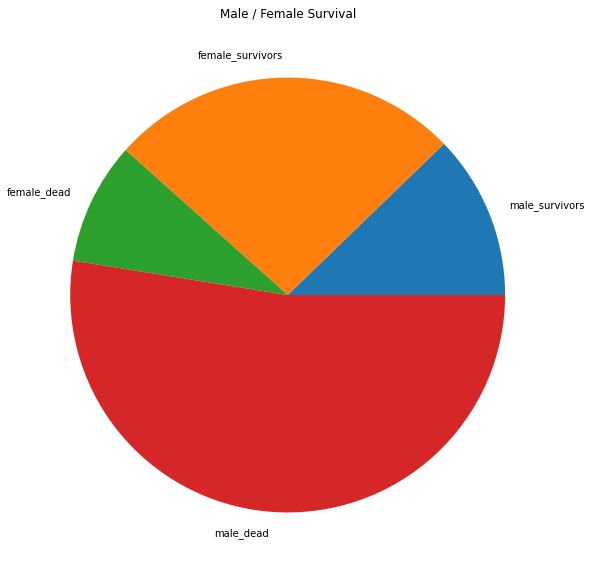

In [13]:
male_survivors = sum(men)
male_dead = len(men) - male_survivors
female_survivors = sum(women)
female_dead = len(women) - female_survivors

y = [male_survivors, female_survivors, female_dead, male_dead]
my_labels = ['male_survivors', 'female_survivors', 'female_dead', 'male_dead']

plt.figure(figsize=(20,10))
plt.pie(y, labels = my_labels)
plt.title("Male / Female Survival")
plt.show()


Clearly it was better to be a woman.  This could be a binary model.  True for women.  False for men.

# Passenger Class Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

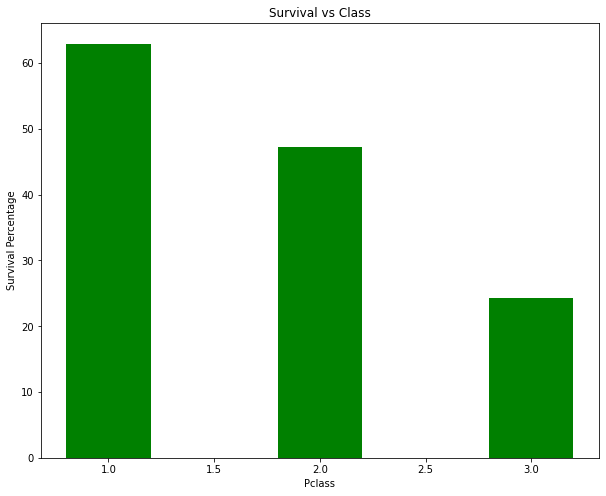

In [14]:
passenger_class = train_data['Pclass']
survived = train_data['Survived']

counts = [0,0,0]
survivors = [0,0,0]
i = 0
while i < len(passenger_class):
    person = passenger_class[i] - 1
    counts[person] = counts[person] + 1
    if survived[i] == 1:
        survivors[person] = survivors[person] + 1
    i = i + 1

percentage_survivors = [100 * survivors[i]/counts[i] for i in (0,1,2)]
categories = [1,2,3]
plt.figure(figsize=(10,8))
plt.bar(categories, percentage_survivors, color='green',width = .4)
plt.xlabel("Pclass")
plt.ylabel("Survival Percentage")
plt.title("Survival vs Class")
plt.show

**Wow.  Class is a big inicator of survival.**

# Fare Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

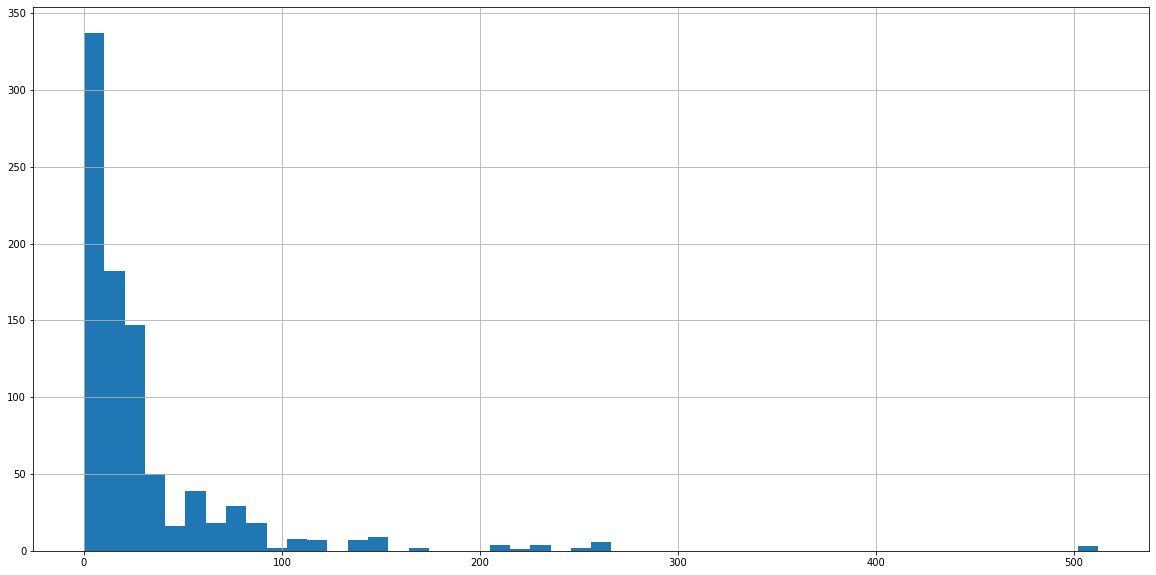

In [15]:
passenger_fare = train_data['Fare']
survived = train_data['Survived']

passenger_fare.hist(bins=50, figsize=(20,10))
plt.show

Most fares were in the $0-$30 range.  One $500 fare is way out there.

# Sibling Analysis

[608, 209, 28, 16, 18, 5, 0, 0, 7]
[0.34539473684210525, 0.5358851674641149, 0.4642857142857143, 0.25, 0.16666666666666666, 0.0, 0, 0, 0.0]


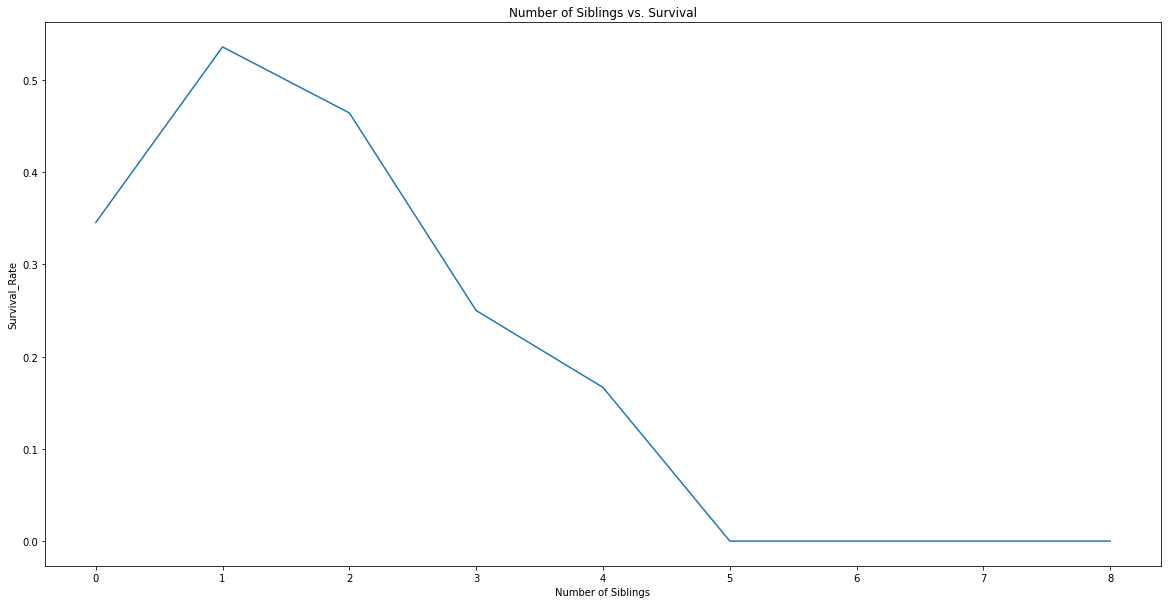

In [16]:
siblings = train_data['SibSp']
survived = train_data['Survived']

categories = [0,1,2,3,4,5,6,7,8]
percent_survived = list()
totals = list()
for entry in categories:
    total_count = 0
    survivor_count = 0
    i = 0
    while i < len(siblings):
        if siblings[i] == entry:
            total_count += 1
            if survived[i] == 1:
                survivor_count += 1
        i = i + 1
    totals.append(total_count)
    if total_count == 0:
        percent_survived.append(0)
    else:
        percent_survived.append(survivor_count / total_count)
print(totals)
print(percent_survived)

x = [i for i in range(0,9)]
y = percent_survived

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.title("Number of Siblings vs. Survival")
plt.xlabel("Number of Siblings")
plt.ylabel("Survival_Rate")
plt.show()

**The number of siblings had a dramatic impact on survival.  This was not immediatly intuitive to me.  Probably in the chaos everyone was looking for each other, and no one got on the boats without their family.**

# Add a column for sex.  1 for female: 1 for male.

In [17]:
def make_new_column(data):
    new_column = data.copy()
    i = 0
    while i < len(new_column):
        if new_column[i] == 'male':
            new_column[i] = 0
        if new_column[i] == 'female':
            new_column[i] = 1
        i += 1
    return new_column
    
sex_binary = train_data['Sex']
sex_binary = make_new_column(sex_binary)
train_data['Sex_Binary'] = sex_binary
sex_binary = test_data['Sex']
sex_binary = make_new_column(sex_binary)
test_data['Sex_Binary'] = sex_binary

In [18]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Sex_Binary", "Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
